In [1]:
import os, sys
sys.path.insert(0, '../src')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib widget

In [4]:
def sort_by_value(item_list, order='desc'):
    """
    A utility function to sort lists by their value.
    Args:
        item_list:
        order:

    Returns:

    """

    if order == 'desc':
        sorted_list = sorted(item_list, key=lambda x: (x[1], x[0]), reverse=True)
    else:
        sorted_list = sorted(item_list, key=lambda x: (x[1], x[0]), reverse=False)

    return sorted_list

In [4]:
from graphrank.graphrank import GraphRank
from graphrank.utils import GraphUtils, TextPreprocess
from graphrank import dgraph as dg
import networkx as nx
import json as js

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shashank/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
utils = GraphUtils()

In [6]:
json_file = 'meeting.json'

In [5]:
import json as js

In [11]:
with open('meeting.json') as f:
    meeting = js.load(f)

In [15]:
context_id = meeting['contextId']

In [14]:
g = nx.Graph()

In [49]:
g.add_node(context_id, type='contextID')

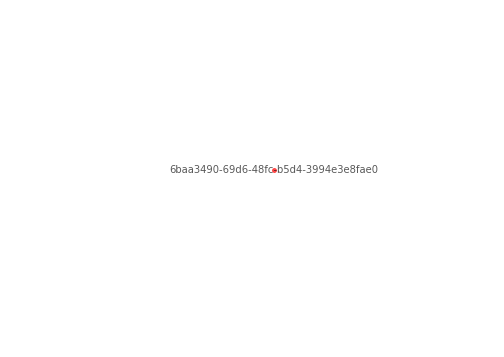

In [23]:
utils.draw_graph(g)

In [24]:
segment_arr = meeting['segments']

In [29]:
segment_arr[188]

{'id': '5e375cad3c8f408fa505a266dfbbf0ba',
 'originalText': "End point of ether will take some user ID. So same shouldn't to be hermes user facing.",
 'filteredText': "End point of ether will take some user ID. So same shouldn't to be hermes user facing.",
 'confidence': 0.8720274,
 'startTime': '2019-01-29T06:01:38Z',
 'endTime': '2019-01-29T06:01:46Z',
 'duration': 8,
 'recordingId': '51329eb83be34730ac9fc7c6623f8b4f',
 'spokenBy': '394d6dd0-7dbe-4d77-92c6-2af7f8314329',
 'languageCode': 'en-US',
 'transcriber': 'deepgram',
 'status': 'completed',
 'transcriptId': 'e62bba58-b959-4aab-af7e-a75737fd736c',
 'createdAt': '2019-01-29T06:01:46.557181618Z',
 'updatedAt': '2019-01-29T06:01:59.213043895Z',
 'deletedAt': None,
 'deleted': False,
 'tenantId': '932daeaf-6ae7-44ed-8d8d-f0b6feedc3aa'}

In [30]:
segment_text = segment_arr[188].get('originalText') 

In [31]:
segment_text

"End point of ether will take some user ID. So same shouldn't to be hermes user facing."

In [32]:
meeting_id = '1245'

In [50]:
g.add_node(meeting_id, type='meeting_id')

In [51]:
g.add_edges_from([(context_id, meeting_id)], rel='HAS_MEETING')

In [53]:
g.nodes.data()

NodeDataView({'6baa3490-69d6-48fc-b5d4-3994e3e8fae0': {'type': 'contextID'}, '1245': {'type': 'meeting_id'}})

In [54]:
segment_id = segment_arr[188].get('id')

In [55]:
g.add_node(segment_id, text=segment_text)

In [56]:
g.nodes.data()

NodeDataView({'6baa3490-69d6-48fc-b5d4-3994e3e8fae0': {'type': 'contextID'}, '1245': {'type': 'meeting_id'}, '5e375cad3c8f408fa505a266dfbbf0ba': {'text': "End point of ether will take some user ID. So same shouldn't to be hermes user facing."}})

In [57]:
g.edges.data()

EdgeDataView([('6baa3490-69d6-48fc-b5d4-3994e3e8fae0', '1245', {'rel': 'HAS_MEETING'})])

In [58]:
g.add_edge(meeting_id, segment_id, rel='HAS_SEGMENT')

In [59]:
g.edges.data()

EdgeDataView([('6baa3490-69d6-48fc-b5d4-3994e3e8fae0', '1245', {'rel': 'HAS_MEETING'}), ('1245', '5e375cad3c8f408fa505a266dfbbf0ba', {'rel': 'HAS_SEGMENT'})])

In [60]:
k = nx.Graph(graph_type='keyphrases')

In [63]:
gr = GraphRank()
tp = TextPreprocess()

In [62]:
new_text = "So last week whatever 16 years with respect to the playlist and DRM key, right? " \
"So I was able to test on Safari and chrome both wearing it was able to forward the cookies. " \
"I was just like trying to trace out the cookies whether it's cool being sent in the DRM ta PA all those things. " \
"So one thing is I had tested it, but I wanted the Deep also to test from IOS app also whether we can pass the cookies. " \
"So once that is done, it is like tested it but I just want him to also confirm that part that it can send a cookies from it was have also know but what I am right now stuck is the Eco meat to a double AC p-- a Gateway. " \
"It's not able to proxying it actually. "\
"So as you spend like I was trying to do with the goatee also, there also is not able to do it the same problem is that this something which is going." \
"Hang on, okay."

In [65]:
original_tokens, pos_tuple, filtered_pos_tuple = tp.preprocess_text(new_text, filter_by_pos=True, pos_filter=['NOUN', 'PROPN', 'ADJ', 'FW'], stop_words=False)

In [66]:
word_graph = gr.build_word_graph(filtered_pos_tuple, original_tokens=original_tokens, window=4, reset_graph_context=True)

In [67]:
g.add_node(word_graph)

In [69]:
g.nodes.data()

NodeDataView({'6baa3490-69d6-48fc-b5d4-3994e3e8fae0': {'type': 'contextID'}, '1245': {'type': 'meeting_id'}, '5e375cad3c8f408fa505a266dfbbf0ba': {'text': "End point of ether will take some user ID. So same shouldn't to be hermes user facing."}, <networkx.classes.graph.Graph object at 0x1a298d4400>: {}})

In [71]:
g.edges.data()

EdgeDataView([('6baa3490-69d6-48fc-b5d4-3994e3e8fae0', '1245', {'rel': 'HAS_MEETING'}), ('1245', '5e375cad3c8f408fa505a266dfbbf0ba', {'rel': 'HAS_SEGMENT'})])

/Users/shashank/anaconda3/envs/textrank/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


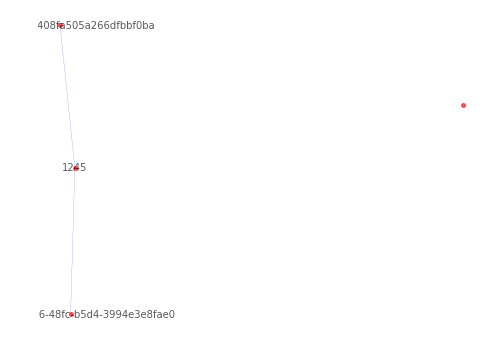

In [70]:
utils.draw_graph(g)

In [72]:
g.add_edge(meeting_id, word_graph, rel='HAS_KEYWORDS')

/Users/shashank/anaconda3/envs/textrank/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


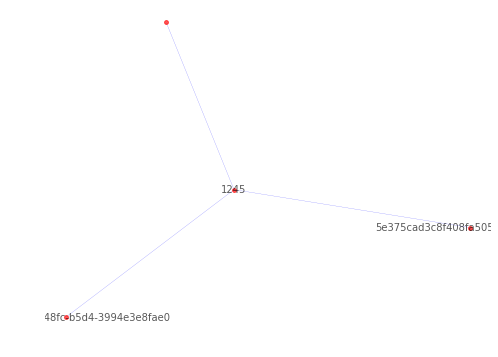

In [73]:
utils.draw_graph(g)

In [74]:
g.edges.data()

EdgeDataView([('6baa3490-69d6-48fc-b5d4-3994e3e8fae0', '1245', {'rel': 'HAS_MEETING'}), ('1245', '5e375cad3c8f408fa505a266dfbbf0ba', {'rel': 'HAS_SEGMENT'}), ('1245', <networkx.classes.graph.Graph object at 0x1a298d4400>, {'rel': 'HAS_KEYWORDS'})])

In [75]:
list(g.nodes.data())

[('6baa3490-69d6-48fc-b5d4-3994e3e8fae0', {'type': 'contextID'}),
 ('1245', {'type': 'meeting_id'}),
 ('5e375cad3c8f408fa505a266dfbbf0ba',
  {'text': "End point of ether will take some user ID. So same shouldn't to be hermes user facing."}),
 (<networkx.classes.graph.Graph at 0x1a298d4400>, {})]

In [76]:
g.adj.items()

ItemsView(AdjacencyView({'6baa3490-69d6-48fc-b5d4-3994e3e8fae0': {'1245': {'rel': 'HAS_MEETING'}}, '1245': {'6baa3490-69d6-48fc-b5d4-3994e3e8fae0': {'rel': 'HAS_MEETING'}, '5e375cad3c8f408fa505a266dfbbf0ba': {'rel': 'HAS_SEGMENT'}, <networkx.classes.graph.Graph object at 0x1a298d4400>: {'rel': 'HAS_KEYWORDS'}}, '5e375cad3c8f408fa505a266dfbbf0ba': {'1245': {'rel': 'HAS_SEGMENT'}}, <networkx.classes.graph.Graph object at 0x1a298d4400>: {'1245': {'rel': 'HAS_KEYWORDS'}}}))

In [77]:
list(g.adj.items())

[('6baa3490-69d6-48fc-b5d4-3994e3e8fae0',
  AtlasView({'1245': {'rel': 'HAS_MEETING'}})),
 ('1245',
  AtlasView({'6baa3490-69d6-48fc-b5d4-3994e3e8fae0': {'rel': 'HAS_MEETING'}, '5e375cad3c8f408fa505a266dfbbf0ba': {'rel': 'HAS_SEGMENT'}, <networkx.classes.graph.Graph object at 0x1a298d4400>: {'rel': 'HAS_KEYWORDS'}})),
 ('5e375cad3c8f408fa505a266dfbbf0ba',
  AtlasView({'1245': {'rel': 'HAS_SEGMENT'}})),
 (<networkx.classes.graph.Graph at 0x1a298d4400>,
  AtlasView({'1245': {'rel': 'HAS_KEYWORDS'}}))]

AttributeError: 'Graph' object has no attribute 'edge'

In [80]:
gt = nx.Graph()

In [81]:
gt.add_edges_from([(1, 2), (4,5)])

/Users/shashank/anaconda3/envs/textrank/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


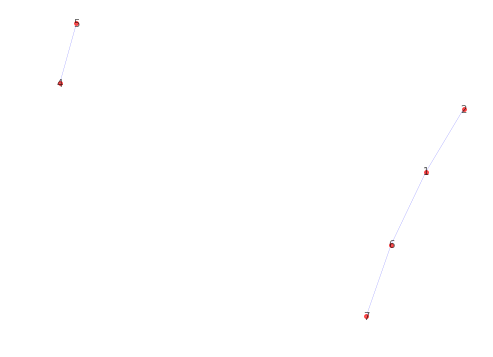

In [86]:
utils.draw_graph(gt)

In [83]:
gt.add_edge(6, 7)

In [85]:
gt.add_edge(6,1)

In [87]:
a = (1, 2, 4)
b = ('c', 4, 6)

In [92]:
c = []
c.append((a, b))

In [89]:
c

[((1, 2, 4), ('c', 4, 6))]

(1, 2, 4)

# Testing graph building

In [6]:
json_file = 'meeting.json'

In [7]:
meet_data = meet_graph.read_json(json_file)

In [8]:
len(meet_data)

3

In [9]:
mg = meet_graph.build_meeting_graph(json_file)

In [10]:
mg.number_of_edges(), mg.number_of_nodes(), mg.number_of_selfloops()

(895, 304, 0)

In [11]:
len(meet_data['segments'])

298

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))
plt.axis('off')
pos = nx.spring_layout(mg, k=0.2, iterations=20)
nx.draw_networkx(mg, pos=pos, arrows=True, with_labels=False, node_size=10, alpha=0.65, width=0.2,
                 edge_color='b', font_size=10)
plt.show()

FigureCanvasNbAgg()

In [46]:
user_list = set()
for u, v, attrs in mg.edges.data():
    if attrs['rel'] == 'spoken_by':
        # print(v)
        user_list.add(v)

In [47]:
user_list

{'394d6dd0-7dbe-4d77-92c6-2af7f8314329',
 '7eeb4d50-dba0-4cf8-a393-0d93a5ad2c69'}

In [42]:
seg_list = set()
for u, v, attrs in mg.edges.data():
    if attrs['rel'] == 'has_segment':
        # print(v)
        seg_list.add(v)

In [44]:
len(seg_list)

298

In [48]:
type(seg_list)

set

In [49]:
list(mg.edges.data())

[('6baa3490-69d6-48fc-b5d4-3994e3e8fae0', 'b34997', {'rel': 'has_meeting'}),
 ('b34997',
  '40c778dca28f49f7aa00ea374019d3bb',
  {'text': "The scope scope then in somewhere the same user will be able to access multiple meetings. This route. We just same you can see meeting this meeting on this minute yeah and we will have some default. It's expiry like one day ready for by all of those meaning we remove those maintenance on the same token the token on handle will not take expand tokens from the server. We'll will just remove the scope meetings scope from the is not the client will.",
   'confidence': 0.88020426,
   'start_time': '2019-01-29T05:33:10Z',
   'end_time': '2019-01-29T05:33:45Z',
   'duration': 35,
   'language': 'en-US',
   'rel': 'has_segment'}),
 ('b34997',
  '439f72efc988422fb0c35e3c1316b150',
  {'text': "The scope scope then in somewhere the same user will be able to access multiple meetings. This route. We just same you can see meeting this meeting on this minute yeah 